In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
X = pd.read_csv("Training Data/Linear_X_Train.csv").values

In [3]:
y = pd.read_csv("Training Data/Linear_Y_Train.csv").values

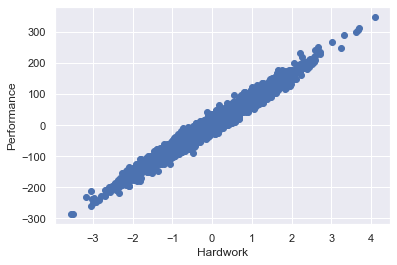

In [4]:
plt.scatter(X,y)
plt.grid(True)
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()

### linear regression

In [5]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X , Y ,theta):
    m  = X.shape[0]
    grad = np.zeros((2,))
    
    for i in range(m):
        x = X[i]
        y_ = hypothesis(X[i],theta)
        y = Y[i]
        grad[0] +=(y_-y)
        grad[1] +=(y_-y)*x
        
    return grad/m

def error(X,Y , theta):
    ##SSE , MSE
    #(sum(y-y_)**2)
    m = X.shape[0]
    total_error  = 0
    
    for i in range(m):
        y_ = hypothesis(X[i] , theta)
        total_error += ((y_ - Y[i])**2)
    
    return total_error/m




In [6]:
def gradientDescent(X, Y , lr = 0.1,max_steps = 100):
    theta = np.zeros([2,])
    error_list = []
    theta_list = []
    for i in range(max_steps):
        grad  = gradient(X,Y,theta)
        e = error(X,Y,theta)[0]
        
        theta[0] = theta[0] - lr*grad[0]
        theta[1] = theta[1]  - lr*grad[1]
        
        error_list.append(e)
        theta_list.append([theta[0] , theta[1]])
    return theta , theta_list , error_list

In [7]:
theta , theta_list , error_list = gradientDescent(X,y)

In [8]:
theta

array([ 3.72687896, 80.54086647])

In [9]:
(np.array(error_list)).shape

(100,)

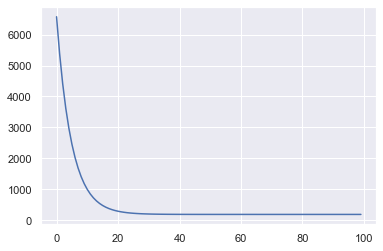

In [10]:
plt.plot(error_list)

In [11]:
y_ = hypothesis(X , theta)

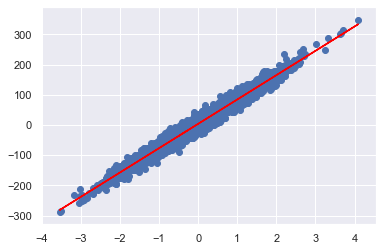

In [12]:
plt.plot(X,y_ , c="red")
plt.scatter(X,y)

In [13]:
 y , y_

(array([[-9.11011171e-02],
        [-5.34677208e+01],
        [ 7.54570088e+01],
        ...,
        [-3.49832749e+01],
        [ 1.45206092e+02],
        [-1.71244939e+01]]),
 array([[-19.57419108],
        [-43.69635897],
        [ 86.48322254],
        ...,
        [-20.85126634],
        [138.69991375],
        [-35.87967507]]))

In [14]:
def accuracy(y , y_):
    num = np.sum((y-y_)**2)
    deno = np.sum((y-y.mean())**2)
    print(num)
    print(deno)
    
    acc = 1 - num/deno
    return acc*100

In [15]:
accuracy(y,y_)

716083.4546583984
24659558.908861957


97.09612220841039

In [21]:
from mpl_toolkits.mplot3d import Axes3D


In [22]:
theta

array([ 3.72687896, 80.54086647])

In [23]:
T0 = np.arange(-40,40,1)
T1 = np.arange(40,120,1)
T0 , T1 = np.meshgrid(T0,T1)

In [24]:
J = np.zeros(T0.shape)

In [25]:
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j] = np.sum((y-y_)**2)/y.shape[0]

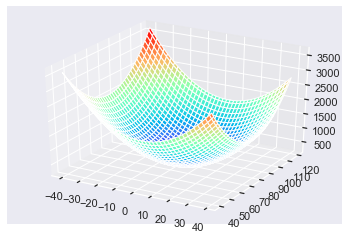

In [26]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

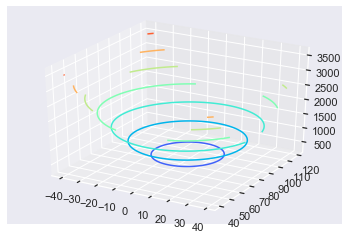

In [27]:
# Contour Plot 
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()